## Abstract Sapientino with Restraining Bolts.

Level of abstraction "zero", with restraining bolts.

The goal is to visit N colors in a certain order.

In [6]:
%matplotlib inline
from multinav.helpers.temprl import MyTemporalGoalWrapper
from multinav.algorithms.value_iteration import value_iteration
import random
from multinav.envs.abstract_sapientino import AbstractSapientino
from multinav.helpers.notebooks import print_env, print_automaton
from multinav.restraining_bolts.rb_abstract_sapientino import AbstractSapientinoRB

In [2]:
formula = AbstractSapientinoRB.make_goal()
formula

'<(!red & !green & !blue)*;red;(!red & !green & !blue)*;green;(!red & !green & !blue)*;blue>tt'

In [3]:
tg = AbstractSapientinoRB.make_sapientino_goal()
env = AbstractSapientino(AbstractSapientinoRB.nb_colors, failure_probability=0.0)
print("Before temporal goal wrapper:")
print(f"Observation space: {env.observation_space}")
print(f"Action space: {env.action_space}")
env = MyTemporalGoalWrapper(env, [tg])
print("After temporal goal wrapper:")
print(f"Observation space: {env.observation_space}")
print(f"Action space: {env.action_space}")

Before temporal goal wrapper:
Observation space: Discrete(4)
Action space: Discrete(5)
After temporal goal wrapper:
Observation space: Tuple(Discrete(4), MultiDiscrete([6]))
Action space: Discrete(5)


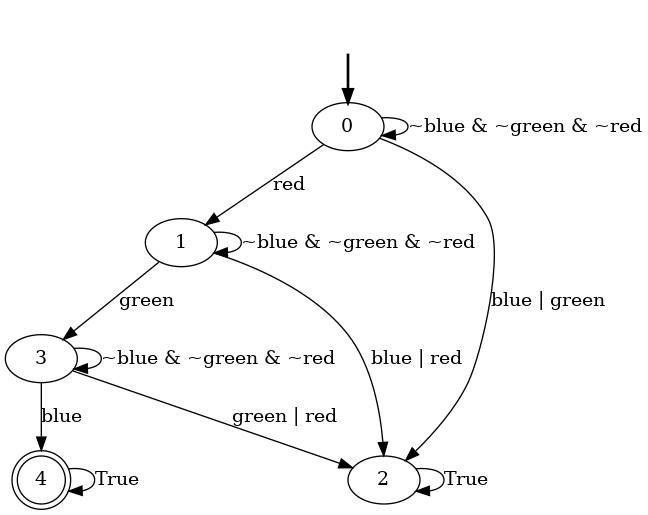

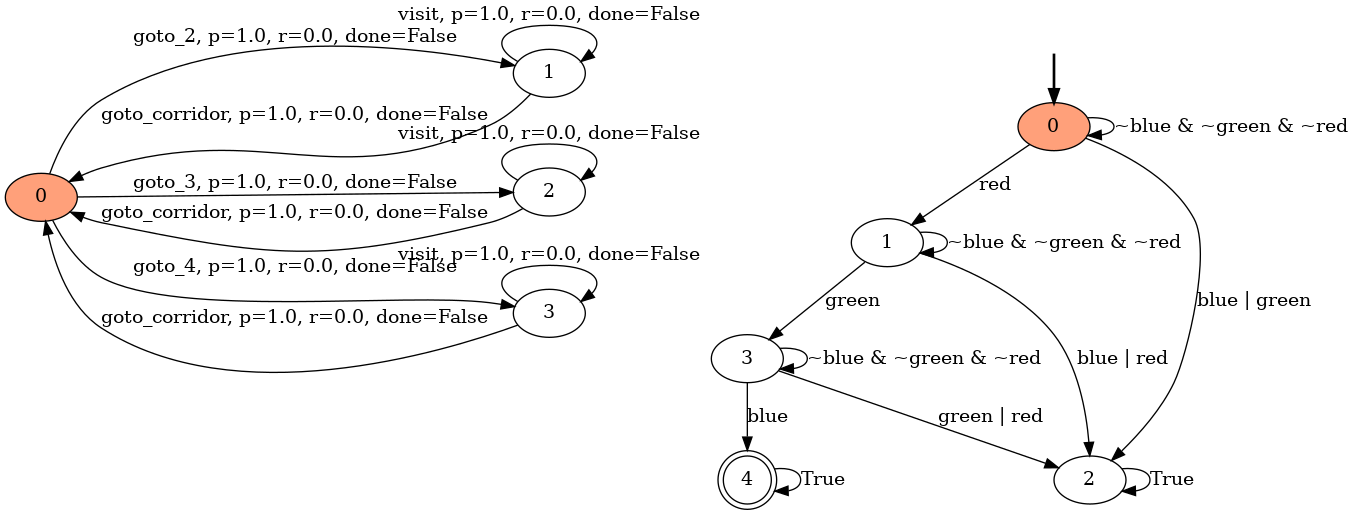

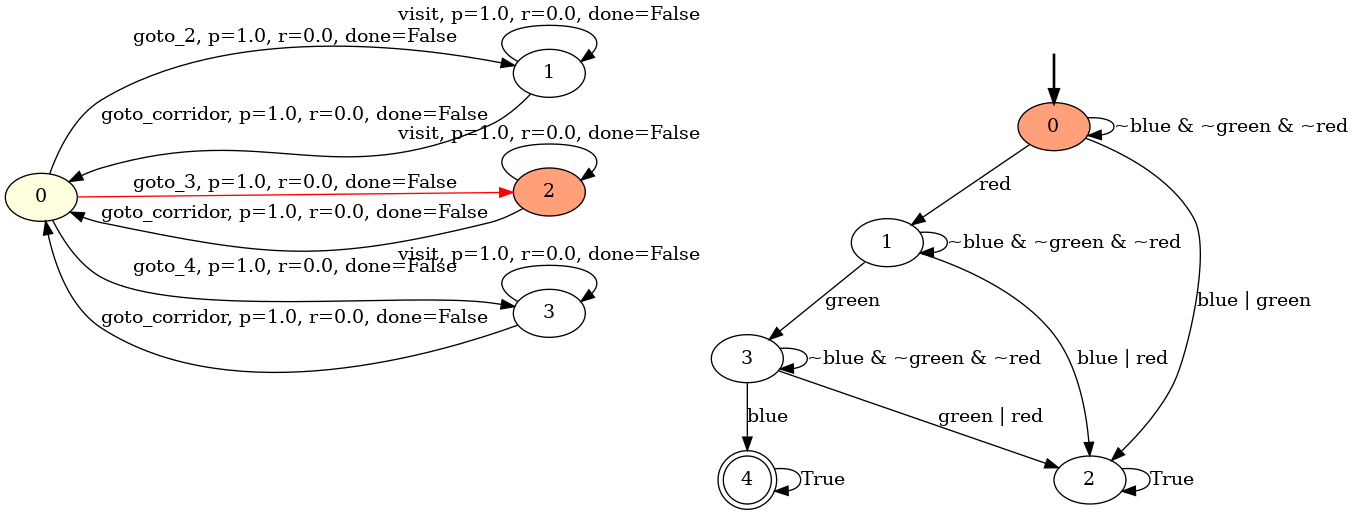

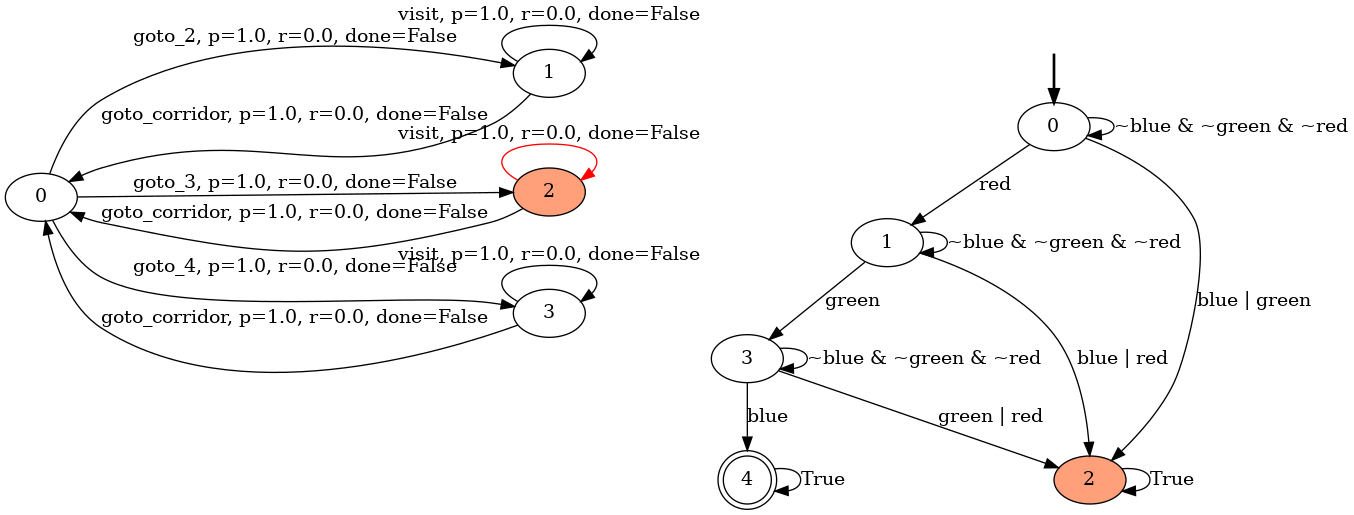

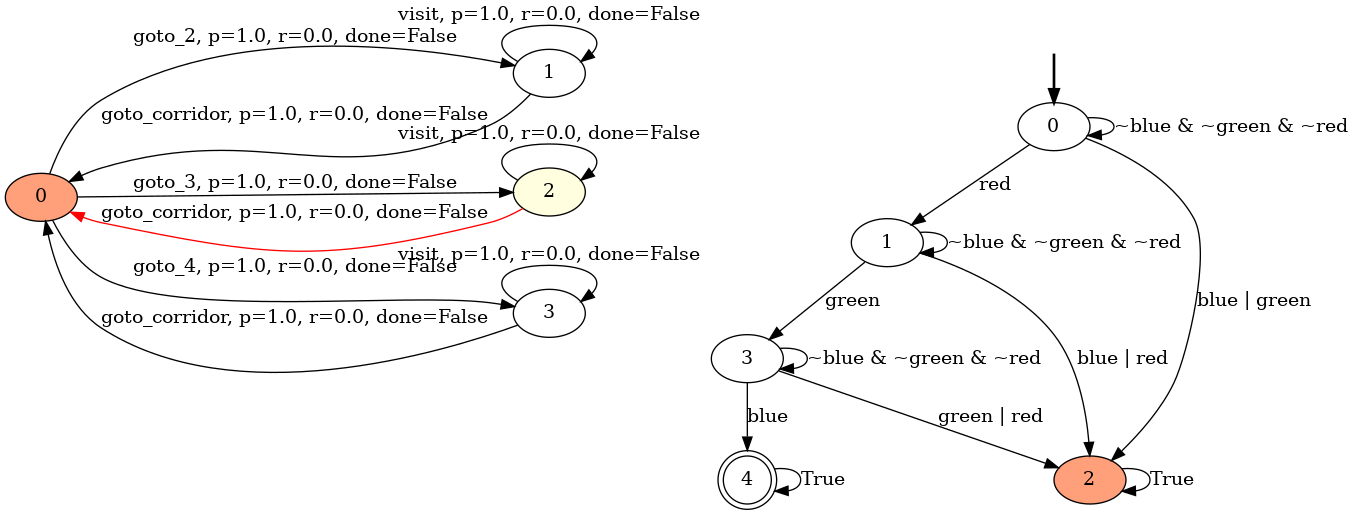

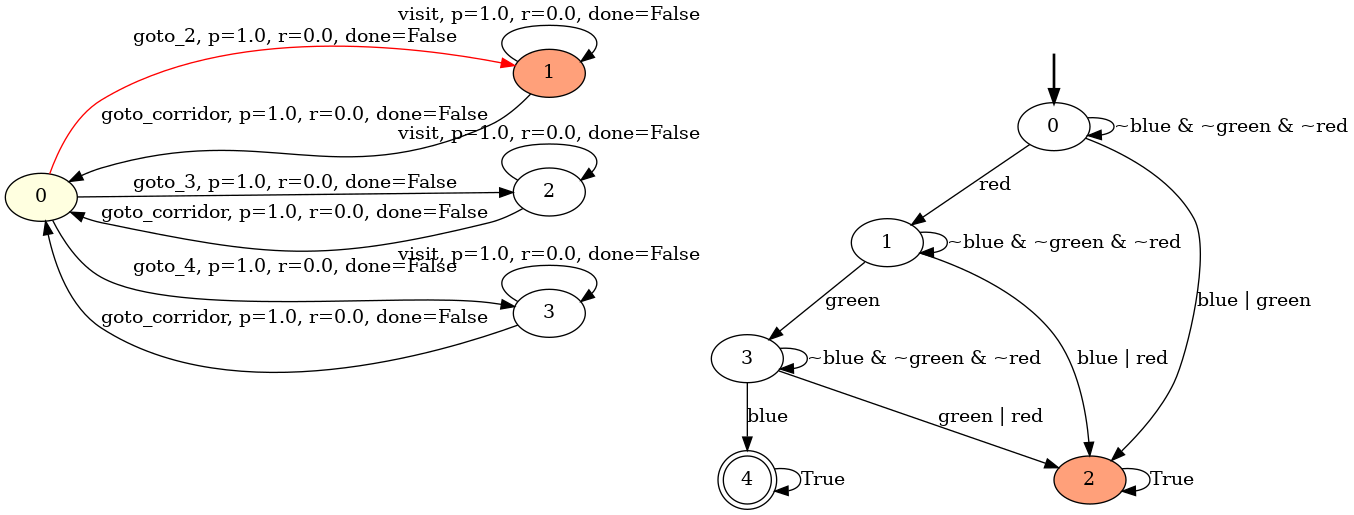

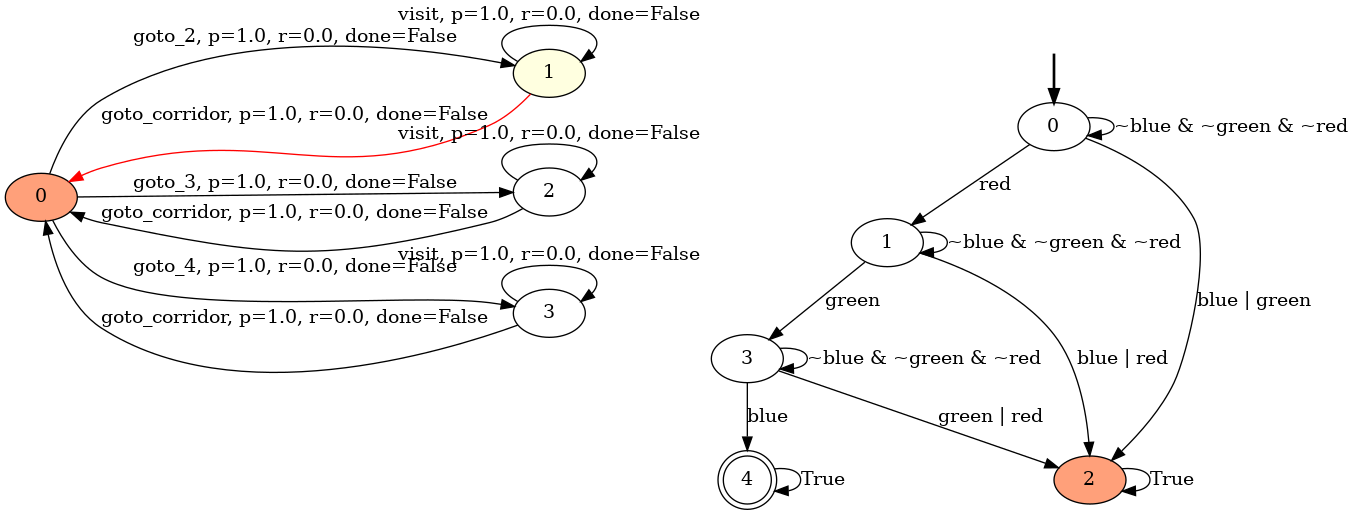

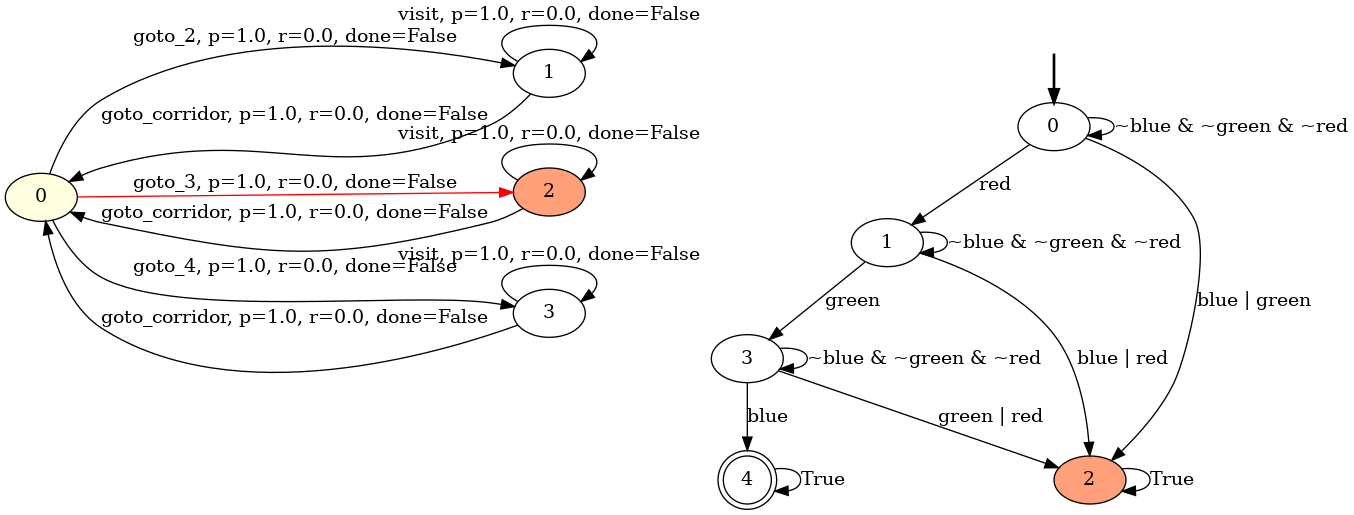

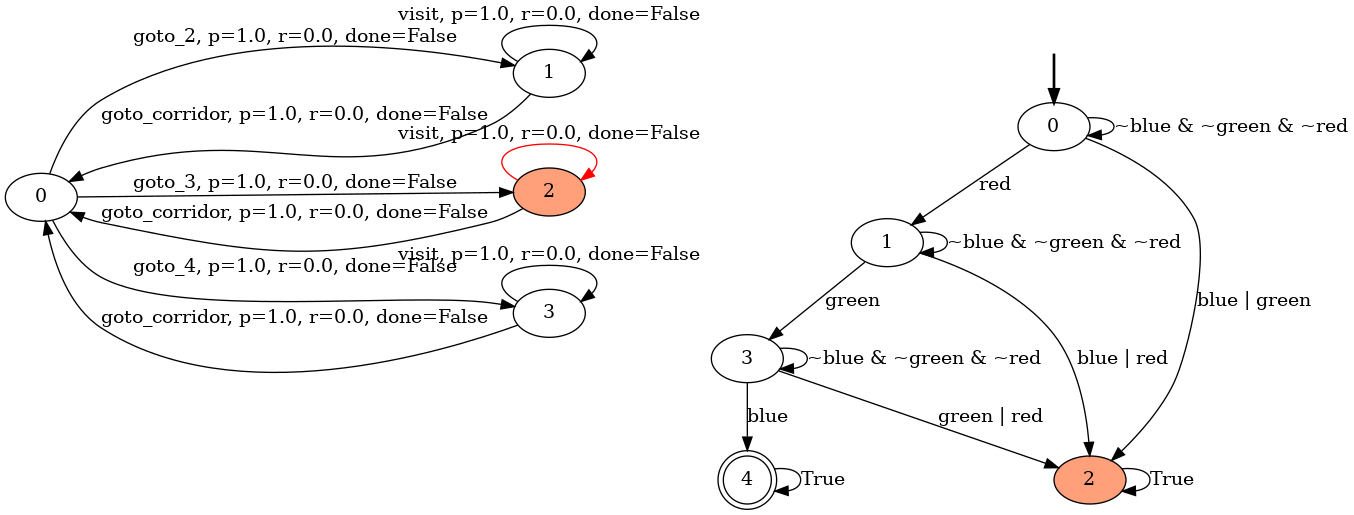

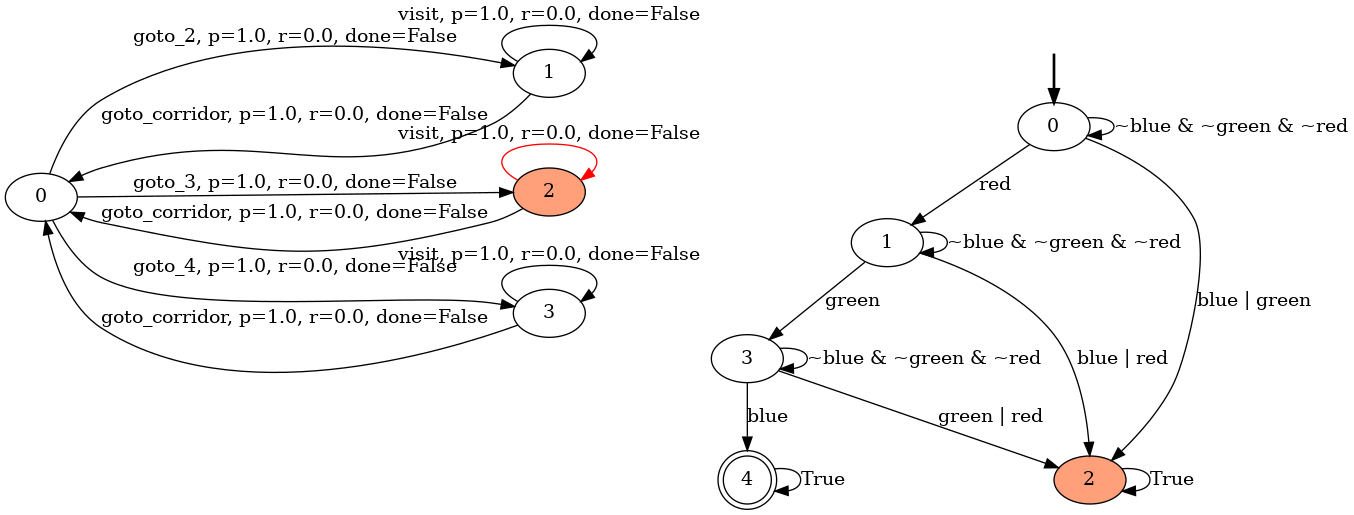

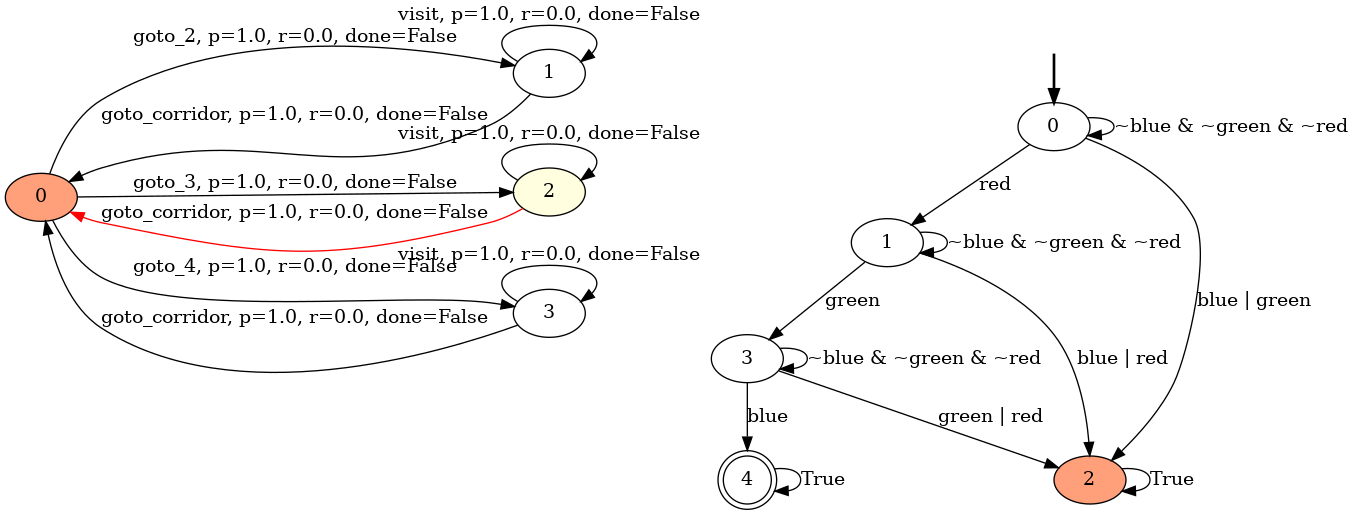

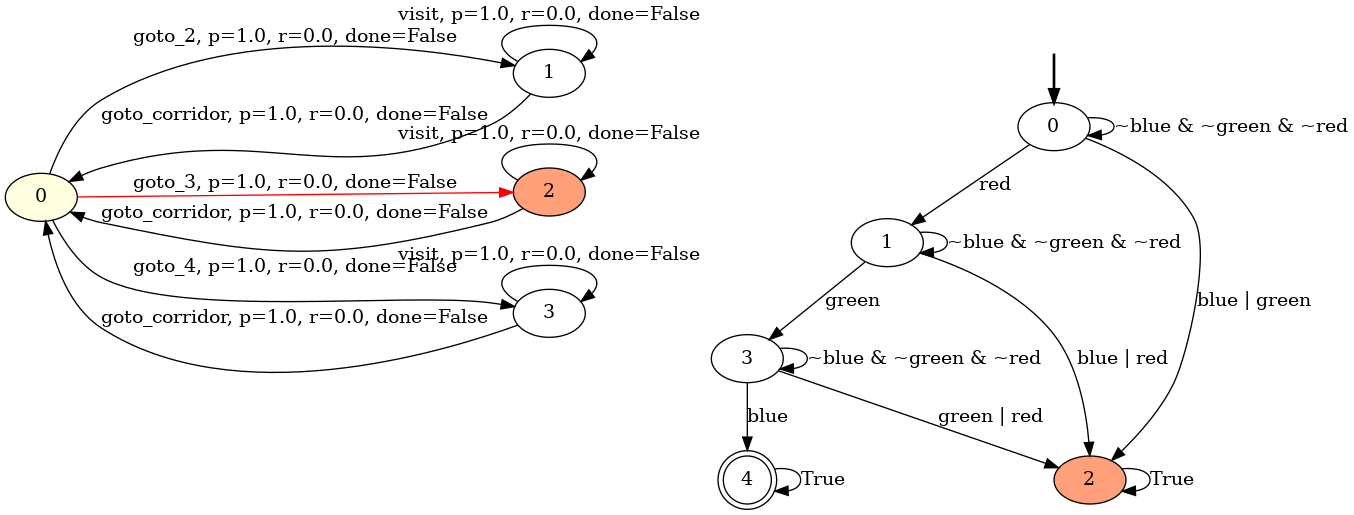

In [4]:
print_automaton(tg.automaton)

state = env.reset()
print_env(env)
for _ in range(10):
    action = random.choice(list(env.available_actions(state[0])))
    state, reward, done, info = env.step(action)
    print_env(env)


In [ ]:
# v = value_iteration(env, discount=0.9, max_iterations=200)
# print(f"Learned value function: {v}")